In [ ]:
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt

In [ ]:
df=pd.read_csv("Linear Regression - Sheet1.csv")
df.head()

,X,Y
0,1,3.888889
1,2,4.555556
2,3,5.222222
3,4,5.888889
4,5,6.555556


In [ ]:
def gradient_descent(derivative, 
                     start_value, 
                     learning_rate, 
                     stop_derivative=0.0001, 
                     stop_iterations=10000):
    x = start_value
    for i in range(stop_iterations):
        print(f'current x = {x}')
        x = x - learning_rate * derivative(x)
        if abs(derivative(x)) < stop_derivative:
            print(f'stopped at x = {x}')
            return x
    print(f'stopped at x = {x}')
    return x


min_x = gradient_descent(derivative=lambda x: 2 * x, 
                         start_value=2,
                         learning_rate=0.25)

print(f'function has minimum at x = {min_x} which is {min_x**2}')

current x = 2
current x = 1.0
current x = 0.5
current x = 0.25
current x = 0.125
current x = 0.0625
current x = 0.03125
current x = 0.015625
current x = 0.0078125
current x = 0.00390625
current x = 0.001953125
current x = 0.0009765625
current x = 0.00048828125
current x = 0.000244140625
current x = 0.0001220703125
current x = 6.103515625e-05
stopped at x = 3.0517578125e-05
function has minimum at x = 3.0517578125e-05 which is 9.313225746154785e-10


In [ ]:
df.describe()

,X,Y
count,300.000000,300.000000
mean,150.500000,102.215556
std,86.746758,57.842711
min,1.000000,1.888889
25%,75.750000,52.388889
50%,150.500000,102.222222
75%,225.250000,152.055556
max,300.000000,201.888889


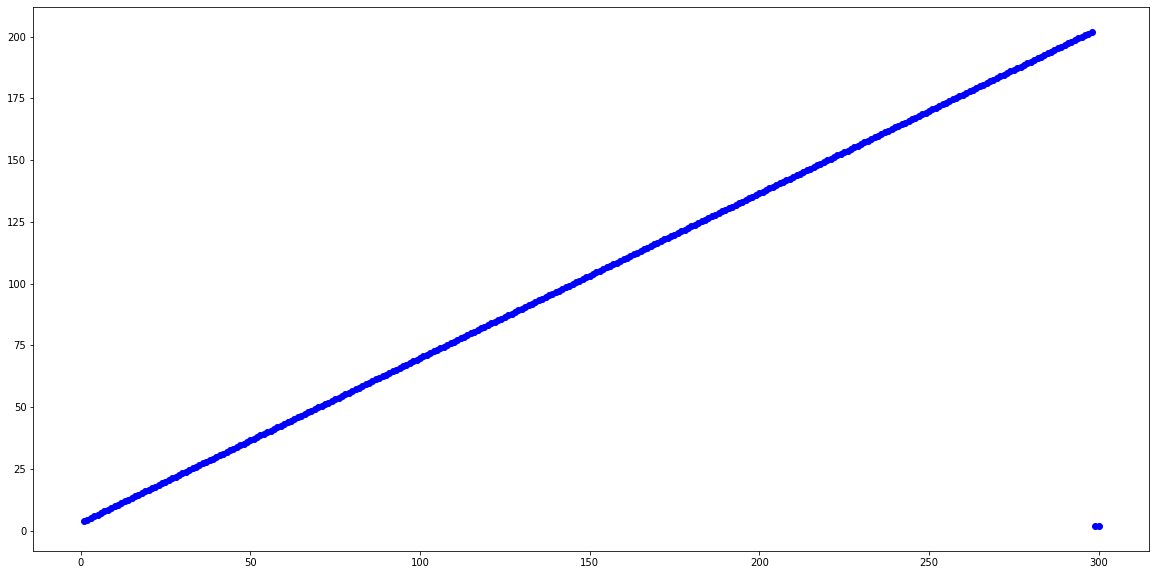

In [ ]:
plt.figure(figsize=(20, 10))
plt.scatter(df["X"], df["Y"], color='blue');


In [ ]:
n = len(df['X'])
x_avg = sum(df['X']) / n
y_avg = sum(df['Y']) / n
a_hat = sum([(df['X'][m] - x_avg) * (df['Y'][m] - y_avg) for m in range(n)]) / sum([(df['X'][m] - x_avg) ** 2 for m in range(n)])
b_hat = y_avg - a_hat * x_avg
print(f'a_hat = {a_hat}, b_hat = {b_hat}')

a_hat = 0.6400448894359696, b_hat = 5.888799701613223


In [ ]:
loss = sum([(a_hat * df['X'][m] + b_hat - df['Y'][m]) ** 2 for m in range(n)]) / n
print(f'loss = {loss}')

loss = 262.2298071449938


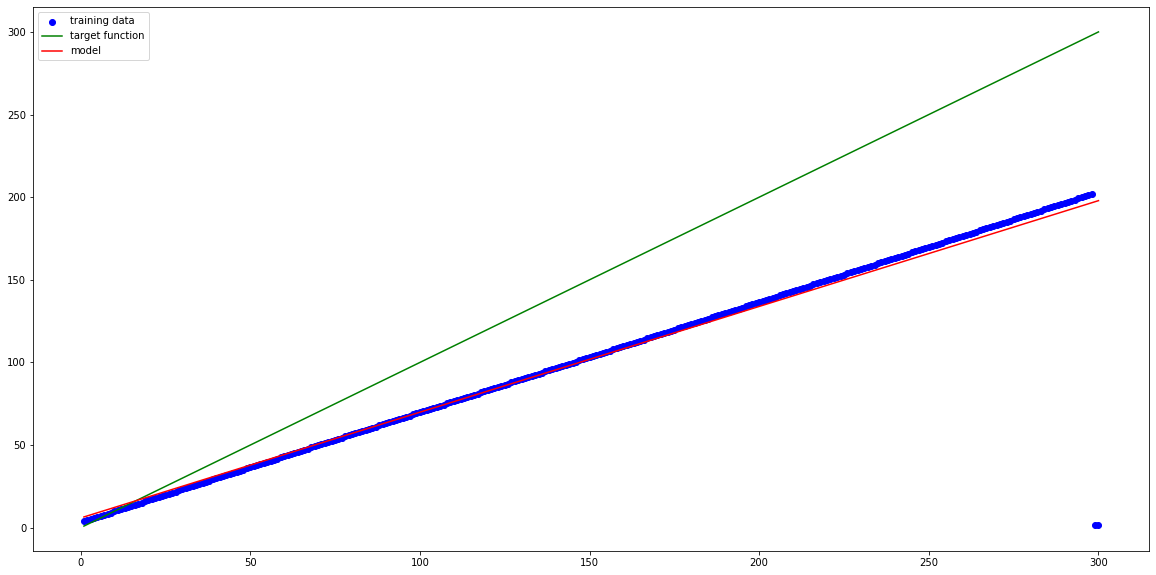

In [ ]:
predictions = [x * a_hat + b_hat for x in df['X']]
actual = df['X']

plt.figure(figsize=(20, 10))
scatter_points = plt.scatter(df['X'], df['Y'], color='blue')
actual_plot, = plt.plot(df['X'], actual, color='green')
predictions_plot, = plt.plot(df['X'], predictions, color='red')
plt.legend([scatter_points, actual_plot, predictions_plot], ['training data', 'target function', 'model'])

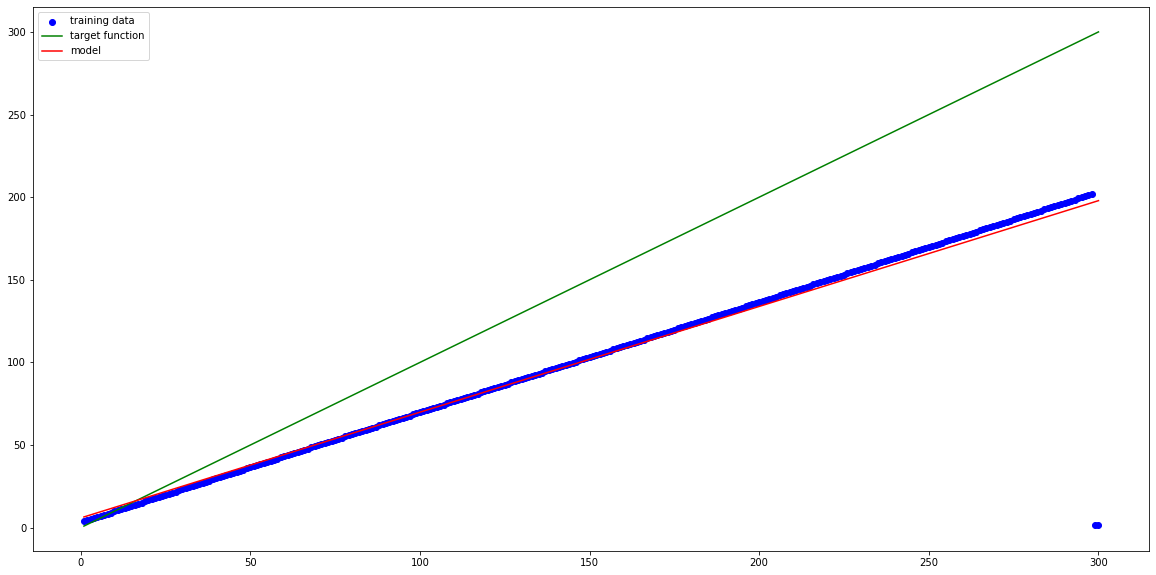

In [ ]:
from sklearn.linear_model import LinearRegression

xs_tensor = np.array(df['X']).reshape(-1, 1)
reg = LinearRegression()
reg.fit(xs_tensor,np.array(df['Y']))
predicted = reg.predict(xs_tensor)

plt.figure(figsize=(20, 10))
scatter_points = plt.scatter(df['X'], df['Y'], color='blue')
actual_plot, = plt.plot(df['X'], actual, color='green')
predictions_plot, = plt.plot(xs_tensor, predicted, color='red')
plt.legend([scatter_points, actual_plot, predictions_plot], ['training data', 'target function', 'model'])

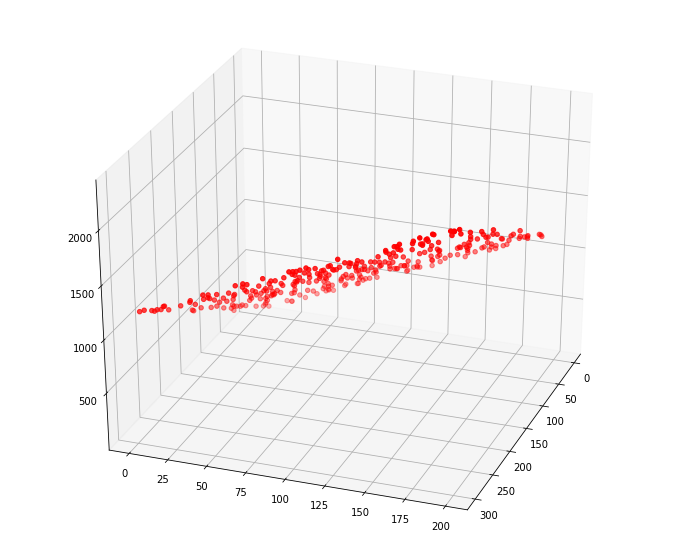

In [ ]:
import random
w_1 = 4
w_2 = 6
b = -3

n = 300
df['X']
x_2s = [random.uniform(1, 200) for _ in range(n)]
ys = [w_1 * x_1s[i] + w_2 * x_2s[i] + b + random.randint(-3, 3) for i in range(n)]

fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(projection='3d')
ax.scatter3D(df['X'], x_2s, ys, color='red')
ax.view_init(30, 20)

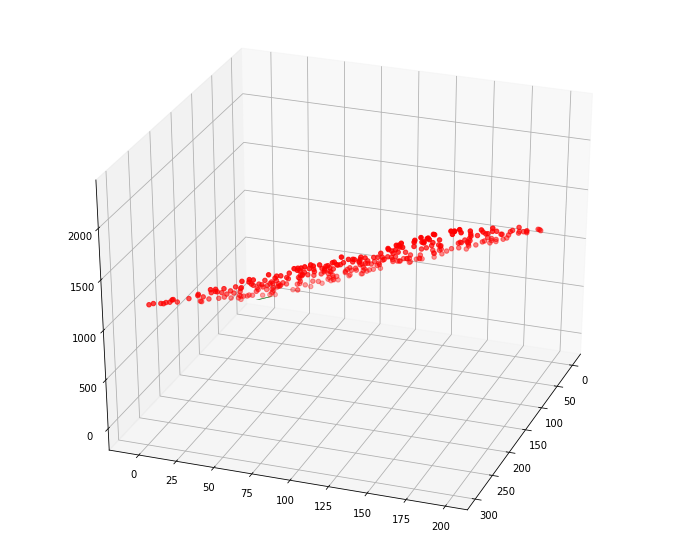

In [ ]:
xs = [[x_1s[i], x_2s[i]] for i in range(n)]

mul_reg = LinearRegression().fit(np.array(xs), np.array(ys))

plot_x = np.arange(-5, 5.1, 0.2)
plot_y = np.arange(-5, 5.1, 0.2)
mesh_x, mesh_y = np.meshgrid(plot_x, plot_y)

mesh_z = np.concatenate([np.expand_dims(mesh_x, axis=-1), np.expand_dims(mesh_y, axis=-1)], axis=-1)
mesh_z = [mul_reg.predict(mesh_z[i]) for i in range(mesh_z.shape[0])]

fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(projection='3d')
ax.plot_surface(mesh_x, mesh_y, np.array(mesh_z), color='green')
ax.scatter3D(x_1s, x_2s, ys, color='red')
ax.view_init(30, 20)